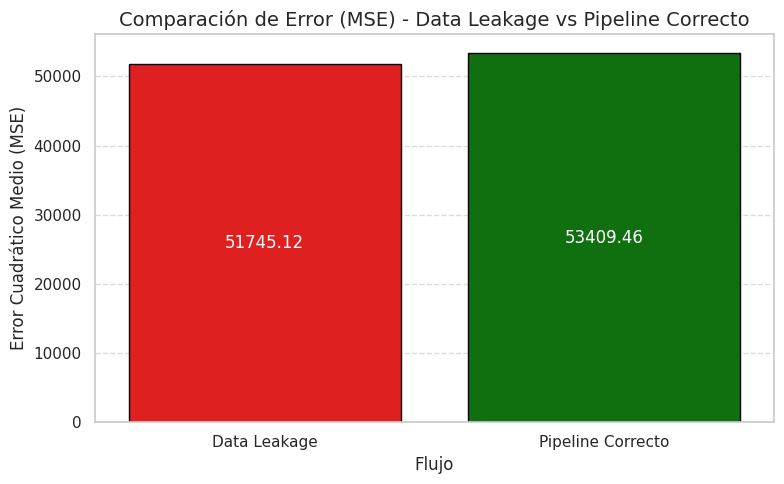

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# 1. Dataset artificial MUY ruidoso y escalado extremo
X, y = make_regression(n_samples=500, n_features=5, noise=200, random_state=42)
X[:, 0] *= 1e6
X[:, 1] *= 1e-6
X[:, 2] *= 1000

# 2. Flujo INCORRECTO (Data Leakage)
scaler_leak = StandardScaler()
X_leak_scaled = scaler_leak.fit_transform(X)

X_train_leak, X_test_leak, y_train_leak, y_test_leak = train_test_split(
    X_leak_scaled, y, test_size=0.2, random_state=42
)

model_leak = KNeighborsRegressor(n_neighbors=5)
model_leak.fit(X_train_leak, y_train_leak)
y_pred_leak = model_leak.predict(X_test_leak)

mse_leak = mean_squared_error(y_test_leak, y_pred_leak)

# 3. Flujo CORRECTO (Pipeline)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

mse_correct = mean_squared_error(y_test, y_pred)

# 4. Calcular diferencia relativa
error_relative = ((mse_correct - mse_leak) / mse_leak) * 100

'''# 5. Gráfico comparativo
fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.bar(
    ["Data Leakage (mse_leak)", "Pipeline Correcto (mse_correct)"],
    [mse_leak, mse_correct],
    color=["red", "green"],
    edgecolor="black"
)

for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        yval + (0.05 * max(mse_leak, mse_correct)),
        f'{yval:.2f}',
        ha='center',
        va='bottom'
    )

ax.set_ylabel("Error Cuadrático Medio (MSE)")
ax.set_title("Impacto de Data Leakage vs Uso Correcto (Modelo KNN)")
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(mse_leak, mse_correct) * 1.4)
plt.tight_layout()
plt.show()

# 6. Mostrar incremento
print(f"Incremento del error al corregir el flujo: {error_relative:.2f}%")
'''
# 1. Crear DataFrame
results = pd.DataFrame({
    'Flujo': ['Data Leakage', 'Pipeline Correcto'],
    'MSE': [mse_leak, mse_correct]
})

# 2. Crear gráfico
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=results, x='Flujo', y='MSE', hue='Flujo', palette=['red', 'green'],  edgecolor='black', legend=False)

# 3. Añadir etiquetas a TODAS las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', color='white', fontsize=12 )

# 4. Personalizar
ax.set_ylabel('Error Cuadrático Medio (MSE)')
ax.set_title('Comparación de Error (MSE) - Data Leakage vs Pipeline Correcto', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
